## Sequntial API

사용할 패키지를 불러옵니다.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from utils import standard_scaling, R_squared, train_val_split
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

캘리포니아 집값 데이터 클래스를 불러옵니다.

In [2]:
housing = fetch_california_housing()

데이터를 훈련, 검증, 테스트 데이터로 나눕니다.

In [3]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full)

입력값들을 정규화 시켜줍니다.

In [4]:
x_train = standard_scaling(x_train)
x_val = standard_scaling(x_val)
x_test = standard_scaling(x_test)

신경망의 시퀀스를 만드는 함수로 ```keras.models.Sequntial()```를 사용합니다.

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, # 30개의 유닛이 있는 은닉층
                       activation="relu", # 해당 은닉층의 활성화 함수는 relu를 사용함
                       input_shape=x_train.shape[1:] # 입력층을 따로 지정하지 않고 바로 사용
                      ), 
    keras.layers.Dense(1) # 출력값은 1개 이므로 유닛이 1개인 출력층을 만듦
])

만들어진 시퀀스 모델의 구조를 확인합니다.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


구조가 확정된 모델의 학습방법을 지정하고 학습을 진행합니다.  
추가적으로 모델의 과대적합을 피하기 위한 조기종료 콜백을 추가합니다.

In [7]:
model.compile(loss="mean_squared_error", # 손실함수로는 평균제곱오차를 사용
              optimizer="sgd" # 최적화기법으로 확률적 경사하강법 사용
             )  


early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, # 3번까지 모델이 향상도지 않으면 조기종료
                                                  restore_best_weights=True # 훈련이 끝난 후 최상의 가중치 복원
                                                 )


history = model.fit(x_train, # 입력변수
                    y_train, # 출력변수
                    epochs=20, # 전체 데이터 학습 횟수
                    validation_data=(x_val, y_val), # 에폭마다 검증 데이터 결과 출력
                    callbacks=[early_stopping_cb] # 조기종료 콜백 사용
                   )
mse_test = model.evaluate(x_test, y_test) # 완성된 모델의 테스트 데이터 결과 출력

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.0379 - val_loss: 0.4795
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5155 - val_loss: 0.5430
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4646 - val_loss: 0.6003
Epoch 4/20
162/162 [==============================] - 0s 1ms/step - loss: 0.5499


모델이 학습 잘 학습되어지는지 에폭마다 손실함수 값을 확인합니다.

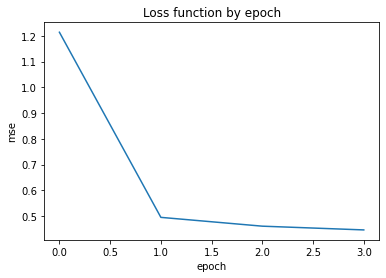

In [8]:
plt.plot(history.history["loss"])
plt.title("Loss function by epoch")
plt.xlabel("epoch")
plt.ylabel("mse")
plt.show()

학습된 모델의 성능 검증을 위하여 결정계수를 구합니다.

In [10]:
pred_y = model.predict(x_test)
y_test = y_test.reshape(-1,1)
evaluate = R_squared(pred_y, y_test) # 결정계수
evaluate

0.5766703398600588